In [1]:
# to set jupyter NB width to full screen
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv("C:\\Users\\sarsadanand\\Desktop\\L&D\\ML\\ML_Case_Study_MobilePrice\\Mobile_Price.csv")

In [4]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# transpose, to view all the features
dataset.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [6]:
dataset.shape

(2000, 21)

In [7]:
dataset.info()
# there is no object column, which is not good... we would ideally need dual_sim (y/n) to object, three_g to object...  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### EDA

In [8]:
# target column is price_range    
dataset.price_range.nunique()

4

- 4 unique values
- multiclass classification model

In [9]:
dataset.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

- 0 --> low priced mobile
- 1 --> medium priced
- 2 --> high priced
- 3 --> very high priced

C:\Users\sarsadanand\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

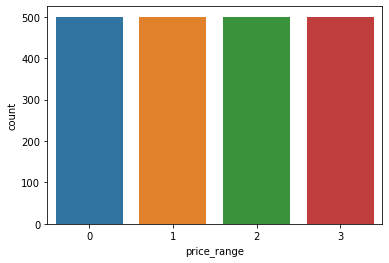

In [10]:
# plot the above 4 classes
# to check distribution of classes
sns.countplot(dataset.price_range) # equal records in each of the class for price_range

In [11]:
# to check distribution of classes
dataset.price_range.value_counts() # we can see that each category has 500 records

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

##### Note: Class imbalance
- Befor working on binary/multiclass classification check for data distribution
- Class imbalance --> if you have < 5% records for a specific class (minority class) 
- In case of class imbalance:
  - treat the data to fix the class imbalance
  - Synthetically/artificially increase records of minority class [SMOTE is the standard approach]

In real life, mostly there will be class imbalance and then we need to treat it using SMOTE
e.g. credit card frauds

In [12]:
# correlation across the features
corr = dataset.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

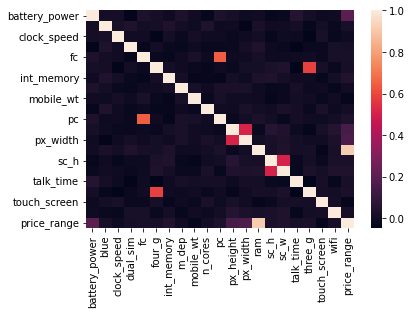

In [13]:
# heat map 
sns.heatmap(corr) 

<AxesSubplot:>

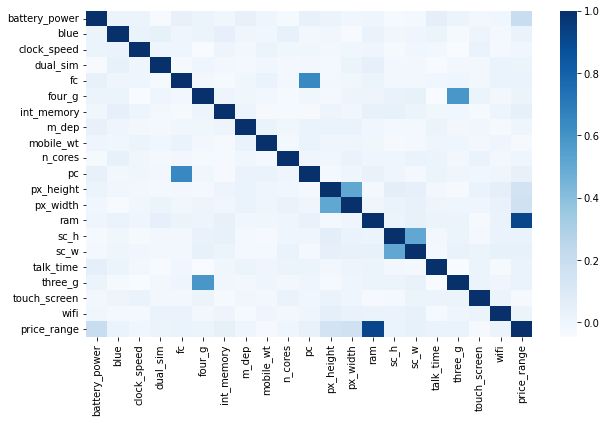

In [14]:
# let's improve this
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="Blues") 


##### Correlation:
- RAM has highest corr with price
- Followed by battery_power, etc.
- To see exact order follow next step...

In [15]:
# for target col, printing the corr w.r.t. other features in a descending order
corr.sort_values(by='price_range', ascending = False).iloc[:,-1:]

,price_range
price_range,1.000000
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.148858
int_memory,0.044435
sc_w,0.038711
pc,0.033599
three_g,0.023611
sc_h,0.022986


<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

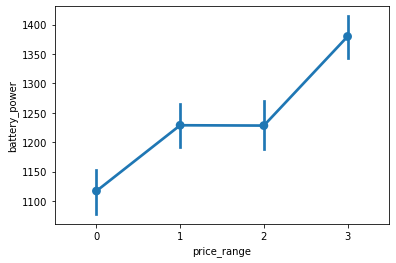

In [16]:
# visual of how battery_power is impacting the price
sns.pointplot(x="price_range", y="battery_power", data=dataset)

* clearly, battery_power increases with price_range

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

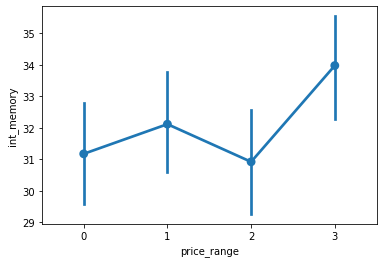

In [17]:
# visual of how int_memory is impacting the price
sns.pointplot(x="price_range", y="int_memory", data=dataset)

* if internal memory is increasing, price range is increasing

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

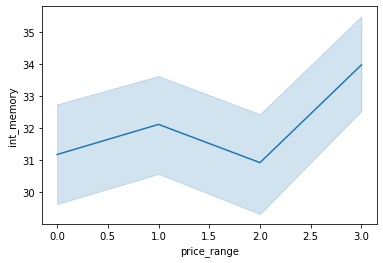

In [18]:
# An alternate way of above representation using lineplot
sns.lineplot(x="price_range", y="int_memory", data=dataset)

<AxesSubplot:xlabel='clock_speed', ylabel='battery_power'>

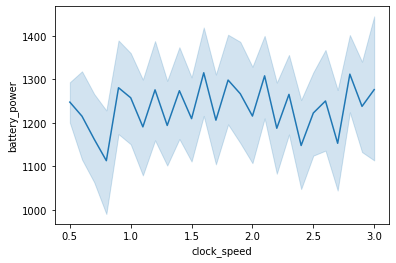

In [19]:
sns.lineplot(x="clock_speed", y="battery_power", data=dataset) # The variation is represented by the shaded region

###### Comparing front and primary cameras:

Text(0.5, 0, 'front camera quality')

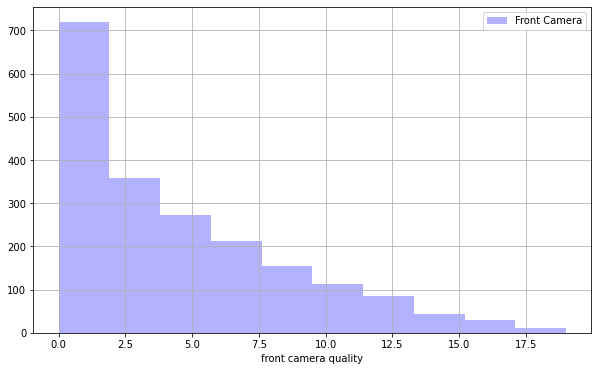

In [20]:
# visual of how front camera (fc) is impacting the price
fig = plt.figure(figsize=(10,6))
dataset.fc.hist(alpha=0.3, color='blue', label = 'Front Camera') # alpha is opacity
plt.legend() # takes the legent from label above
plt.xlabel("front camera quality")

Text(0.5, 0, 'primary camera quality')

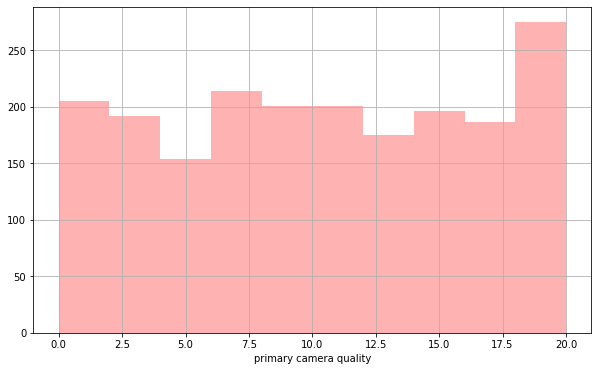

In [21]:
# visual of how primary camera is impacting the price
fig = plt.figure(figsize=(10,6))
dataset.pc.hist(alpha=0.3, color='red') # alpha is opacity
plt.xlabel("primary camera quality")

Combining both the histograms below:

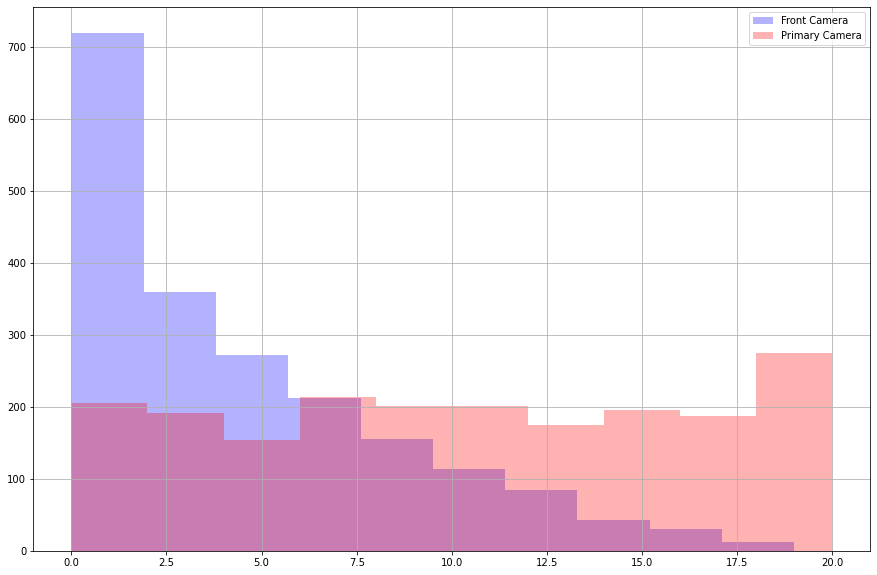

In [22]:
fig = plt.figure(figsize=(15,10))
dataset.fc.hist(alpha=0.3, color='blue', label = 'Front Camera') 
dataset.pc.hist(alpha=0.3, color='red', label = 'Primary Camera')
plt.legend()

- around 200 records where quality is around 6, the quality for front and primary are same 

###### Pie charts to see the 3G/4G supported phones

In [23]:
dataset.three_g.value_counts().values # gives array

array([1523,  477], dtype=int64)

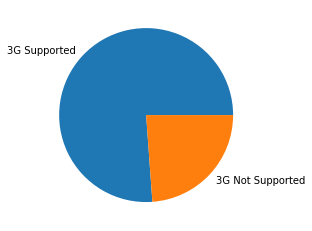

In [24]:
labels = ["3G Supported", "3G Not Supported"]
values = dataset.three_g.value_counts().values

plt.pie(values, labels=labels)
plt.show()

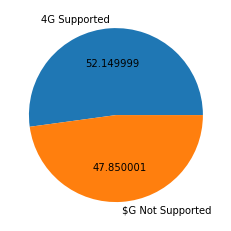

In [25]:
labels = ["4G Supported", "$G Not Supported"]
values = dataset.four_g.value_counts().values

plt.pie(values, labels=labels, autopct= '%f') # using auto percentage 
plt.show()

### Preparing training and testing set

In [26]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [27]:
# creating dataframe X
X = dataset.drop('price_range', axis=1)

In [28]:
# X.head().T

In [29]:
# creating dataframe y
y = dataset["price_range"]

In [30]:
# Creating train and test split
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=101) 

In [31]:
print(dataset.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 21)
(1340, 20)
(660, 20)
(1340,)
(660,)


## DECISION TREE MODEL 
Instead of this refer: Hyperparameter Tuning by using Grid Search Cross Validation (below we are not tuning the hyperparameters)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() # without passing the depth, so the tree will grow to the max. depth that is possible

In [33]:
# fit the model 
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# decision tree visualization
import pydotplus, os
data_dir = "C:\\Users\\sarsadanand\\Desktop\\L&D\\ML\\ML_Decision_Tree"  # Pick any folder of your machine here
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/' # Pick the path of bin folder of Graphviz and paste here
os.chdir(data_dir)

In [35]:
import sklearn.tree as tree
dot_data = tree.export_graphviz(dtree, out_file=None,        # 1/3  give the name of model
                         feature_names=X.columns,            # 2/3  give the list of features
                         class_names=["0","1","2","3"],      # 3/3  give the lable information (y)
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

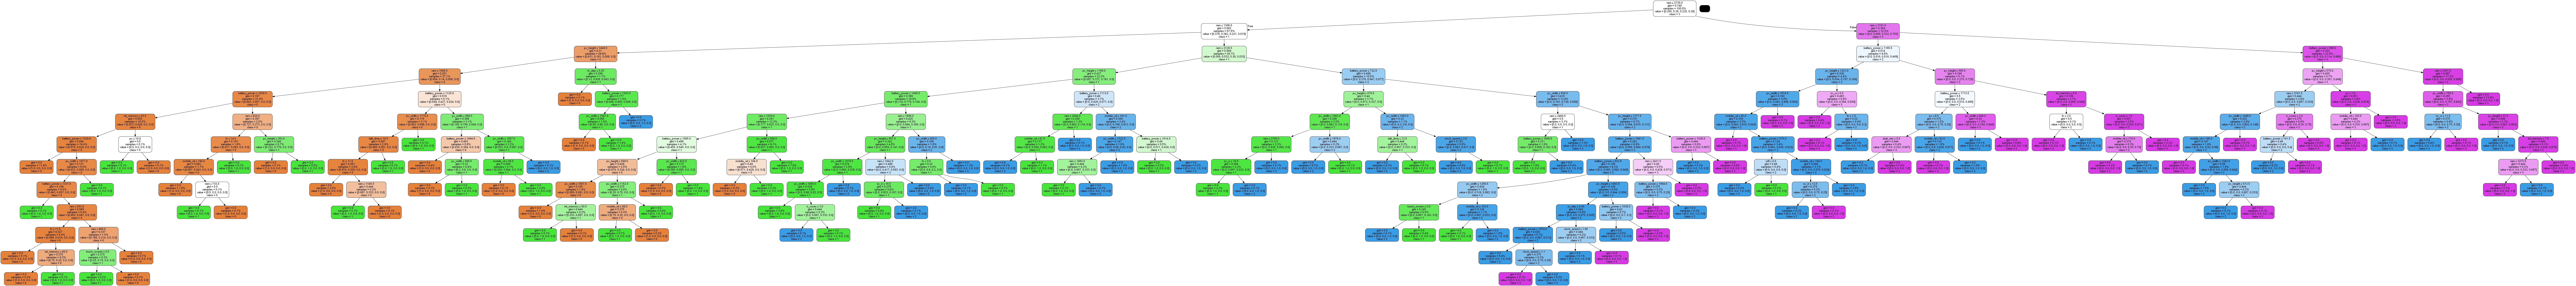

In [36]:
graph = pydotplus.graph_from_dot_data(dot_data)

from IPython.display import Image
Image(graph.create_png())

- right click and save the above image
- the pink boxes represent class 3 (very high priced)
- to understand what factors are contributing to the high cost of mobile phones, we trace back from the last node towards the root node

In [37]:
# accuracy of tree on the train set 
dtree.score(X_train, y_train) # overfitting, too much abitious :-D

1.0

In [38]:
# accuracy of tree on the test set
dtree.score(X_test, y_test)

0.8272727272727273

## ------------------------------------------------------------------------

- Lets try to reduce the depth of the tree
- We can do Grid search cross valildation directly, below code just for practice

In [39]:
# lets try to reduce the depth of the tree 
# we can do Grid search cross valildation directly, below code just for practice
from sklearn.tree import DecisionTreeClassifier
dtree5 = DecisionTreeClassifier(max_depth=5)

In [40]:
dtree5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [41]:
import sklearn.tree as tree
dot_data = tree.export_graphviz(dtree5, out_file=None,        # 1/3  give the name of model
                         feature_names=X.columns,            # 2/3  give the list of features
                         class_names=["0","1","2","3"],      # 3/3  give the lable information (y)
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

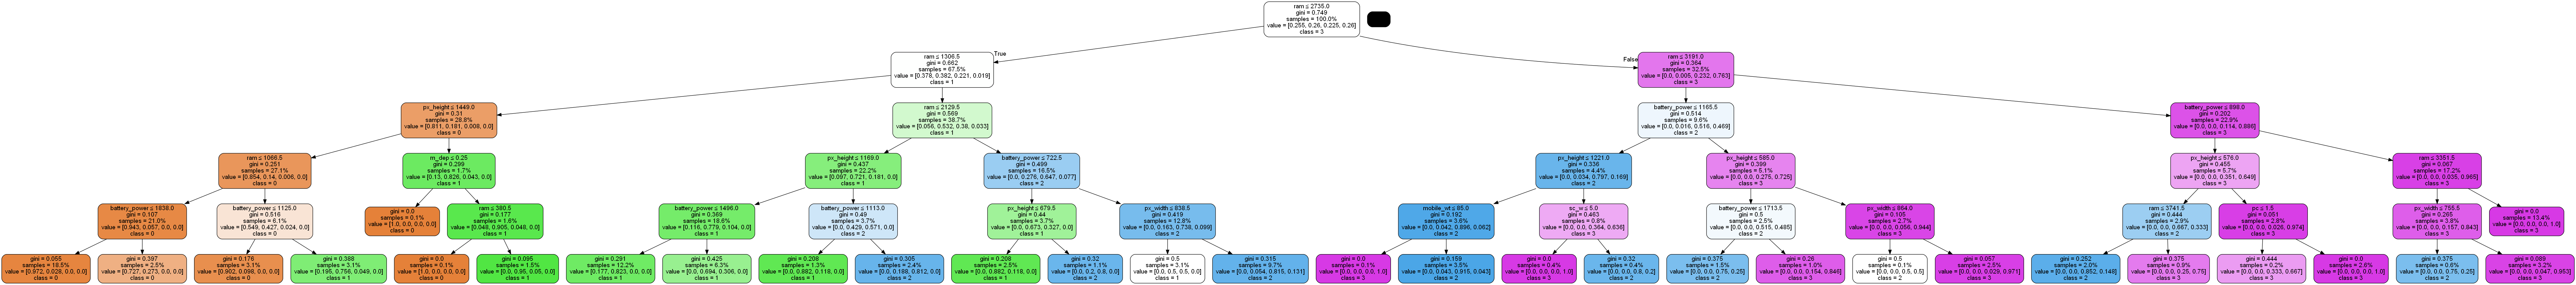

In [42]:
graph = pydotplus.graph_from_dot_data(dot_data)

from IPython.display import Image
Image(graph.create_png())

In [43]:
dtree5.score(X_train, y_train)

0.8716417910447761

In [44]:
dtree5.score(X_test, y_test)

0.8

- the above scores are not overfitted, compared to the score of 1 we received earlier with the train set without pruning the tree

In [45]:
# predictions on test dataset
predictions = dtree5.predict(X_test)

In [46]:
# confusion matrix "X_test predictions" vs "y_test" (actuals)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[133,  25,   0,   0],
       [ 12, 124,  16,   0],
       [  0,  44, 142,  13],
       [  0,   0,  22, 129]], dtype=int64)

In [47]:
# pip install mlxtend

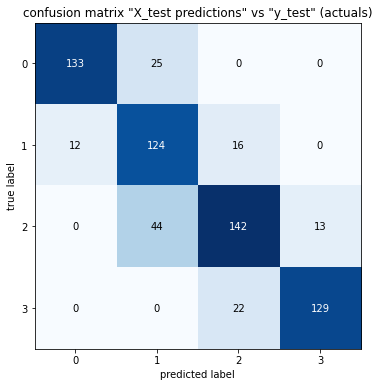

In [48]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, 
                                figsize=(6,6),
                                cmap = 'Blues')
plt.title("confusion matrix \"X_test predictions\" vs \"y_test\" (actuals)")
plt.show()

26 --> these are the mobile which were actually low price (class 0) but were predicted as medium priced (class 1)

In [49]:
# How do we check the performance of a classification model using ROC curve (check ML notes for theory)

In [50]:
# ROC Plot
y_proba = dtree5.predict_proba(X_test)
y_proba

array([[0.17682927, 0.82317073, 0.        , 0.        ],
       [0.17682927, 0.82317073, 0.        , 0.        ],
       [0.        , 0.04255319, 0.91489362, 0.04255319],
       ...,
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.85185185, 0.14814815],
       [0.        , 0.        , 0.        , 1.        ]])

In [51]:
#pip install scikitplot

C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


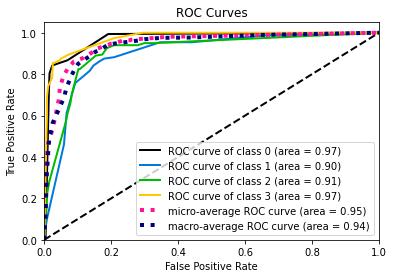

In [52]:
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_proba)
plt.show()

Side note on whether to use plt.show() or not?
- Matplotlib is used in a terminal or scripts, plt.show() is a must.
- Matplotlib is used in a IPython shell or a notebook (ex: Kaggle), plt.show() is unnecessary.


## ------------------------------------------------------------------------

### Hyperparameter Tuning by using Grid Search Cross Validation (DECISION TREE)

In [53]:
from sklearn.model_selection import GridSearchCV

tree_param = {'criterion':['gini', 'entropy'], 
              'max_depth':[4,5,6,7,8,9,10,11,12,15,30,40,70,90,120,150]  #also we can use range function--> 'max_depth':list(range(5,150,5))
              ,'random_state':[100]
             }

clf_dt = GridSearchCV(DecisionTreeClassifier(), tree_param, cv = 5) # Cross Validation 5

In [54]:
clf_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 30, 40,
                                       70, 90, 120, 150],
                         'random_state': [100]})

In [55]:
clf_dt.best_params_ # the best combination of hyperparameters to optimize the accuracy 

{'criterion': 'gini', 'max_depth': 7, 'random_state': 100}

In [56]:
pred1 = clf_dt.predict(X_test)

In [57]:
#pred1

In [58]:
clf_dt.score(X_test,y_test) # Accuracy on test dataset

0.8303030303030303

## RANDOM FOREST CLASSIFIER

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=100) # n_estimators is the number of trees to be used in the forest

In [60]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=100)

In [61]:
rfc.score(X_train,y_train) # this is overfitting, this calls for hyperparameter tuning 

1.0

In [62]:
pred = rfc.predict(X_test)

In [63]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat

array([[151,   7,   0,   0],
       [ 13, 132,   7,   0],
       [  0,  25, 153,  21],
       [  0,   0,  12, 139]], dtype=int64)

In [64]:
rfc.score(X_test,y_test) # Accuracy on test dataset

0.8712121212121212

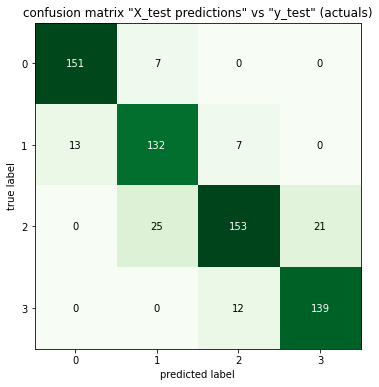

In [65]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat, 
                                figsize=(6,6),
                                cmap = 'Greens')
plt.title("confusion matrix \"X_test predictions\" vs \"y_test\" (actuals)")
plt.show()

In [66]:
#ROC Plot

y_proba = rfc.predict_proba(X_test)

C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


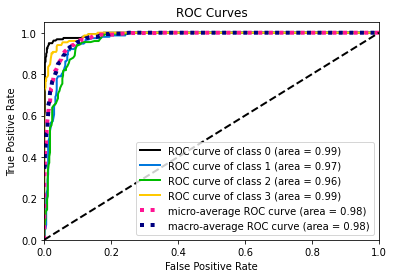

In [67]:
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_proba)
plt.show()

- Comparing this ROC plot to the one with decision tree, we can see that the Random Forest ROC is more meaningful

### Hyperparameter tuning (Random Forest)

In [68]:
for i in range(10,600,20):  # Try 10, 30,50, 70, 90.... 300
    clf = RandomForestClassifier(oob_score=True, n_estimators=i, random_state=100)
    clf.fit(X_train, y_train)
    oob = clf.oob_score_  
    print(" the number of estimators = ", str(i))
    print("Out of bage score is", str(oob))
    print("----------------------------------")

C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


 the number of estimators =  10
Out of bage score is 0.6716417910447762
----------------------------------
 the number of estimators =  30
Out of bage score is 0.7843283582089552
----------------------------------
 the number of estimators =  50
Out of bage score is 0.817910447761194
----------------------------------
 the number of estimators =  70
Out of bage score is 0.8298507462686567
----------------------------------
 the number of estimators =  90
Out of bage score is 0.8462686567164179
----------------------------------
 the number of estimators =  110
Out of bage score is 0.8432835820895522
----------------------------------
 the number of estimators =  130
Out of bage score is 0.8522388059701492
----------------------------------
 the number of estimators =  150
Out of bage score is 0.8507462686567164
----------------------------------
 the number of estimators =  170
Out of bage score is 0.8582089552238806
----------------------------------
 the number of estimators =  190
O

- 310 looks optimal
- remember that the idea is to keep the estimators minimal while obtaining the best oob score

### Validation Dataset

In [69]:
# this dataset was never trained or tested by our model 
dataset1 = pd.read_csv("C:\\Users\\sarsadanand\\Desktop\\L&D\\ML\\ML_Case_Study_MobilePrice\\Mobile_Price_Test.csv")

In [70]:
dataset1.head(2)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0


In [71]:
dataset1 = dataset1.iloc[:,1:] # removing id col
# alternatively --> dataset1.drop('id', axis=1)

In [72]:
dataset1.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0


In [73]:
dataset1.shape # new dataset without price_range

(1000, 20)

In [74]:
X_train.shape # also has 20 cols

(1340, 20)

In [75]:
pred_dataset = dataset1.copy()

In [76]:
# First model was Decision Tree and object was stored in "dtree"
# appending the predictions in dataset1
pred_dataset["Pred_Price_DT"] = dtree.predict(dataset1)
pred_dataset["Pred_Price_RFC"] = rfc.predict(dataset1)

In [77]:
pred_dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Pred_Price_DT,Pred_Price_RFC
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,1412,3476,12,7,2,0,1,0,3,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,857,3895,6,0,7,1,0,0,3,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1366,2396,17,10,10,0,1,1,3,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,1752,3893,10,0,7,1,1,0,3,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,810,1773,15,8,7,1,0,1,1,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,...,939,3506,10,7,3,1,1,1,3,3
6,1718,0,2.4,0,1,0,47,1.0,156,2,...,1374,3873,14,2,10,0,0,0,3,3
7,833,0,2.4,1,0,0,62,0.8,111,1,...,1880,1495,7,2,18,0,1,1,1,1
8,1111,1,2.9,1,9,1,25,0.6,101,5,...,876,3485,11,9,10,1,1,0,3,3
9,1520,0,0.5,0,1,0,25,0.5,171,3,...,1009,651,6,0,5,1,0,1,0,0


### Important Note:
- now we have 2 predictions, one from DTree and other from random forest 
- like this we can do for Boosting also so we have 3 Pred_Price_XXX columns
- we have 1 decision tree, 2 ensemble (RF, BOOSTING) so the above approach is like ensemble of ensemble
#### FINAL PREDICTION WILL BE AVERAGE (regression) OR MAX VOTES (classification) BY THE MODELS

------------------------------------------
##### Fun code: Cool way of doing the above things, FYI

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [79]:
# Hyperparameter for model selection

models = {#'LogisticRegression' : LogisticRegression(max_iter=10000), 
          'DecisionTreeClassifier': DecisionTreeClassifier(), 
          'RandomForestClassifier': RandomForestClassifier()}
          #XGBClassifier: XGBClassifier()}

In [80]:
def score_of_model (models,X_train,X_test,y_train,y_test): 
    np.random.seed(0)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores [name] = model.score (X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose() 
    model_scores = model_scores.sort_values('Score')

    return model_scores

In [81]:
model_score = score_of_model (models,X_train,X_test,y_train,y_test)

In [82]:
cm = sns.color_palette('coolwarm',as_cmap=True) 
score = model_score.style.background_gradient(cmap=cm) 
score

,Score
DecisionTreeClassifier,0.821212
RandomForestClassifier,0.866667


-----------------------------------------